# Error Level Analysis || EPOCH Laboratory

Error level analysis (ELA) is the analysis of compression artifacts in digital data with lossy compression such as JPEG

In [1]:
%pylab inline

import os
from PIL import Image, ExifTags, ImageChops, ImageEnhance

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = '/mnt/vanguard/datasets/kandinsky_ghost.jpg'

### View EXIF Data

In [3]:
def viewexif(x):
    image = Image.open(x)
    exifdata = image.getexif()
    
    for tag_id in exifdata:
        tag = ExifTags.TAGS.get(tag_id, tag_id)
        data = exifdata.get(tag_id)
        
        if isinstance(data, bytes):
            data=data.decode()

        print(f"{tag:25}: {data}")

In [4]:
viewexif(filename)

ResolutionUnit           : 2
ExifOffset               : 110
Software                 : Google
Orientation              : 1
XResolution              : 72.0
YResolution              : 72.0


### Error Level Analysis

In [5]:
bound = 10

In [6]:
def errorlevel(x, count):
    temp = 'ela_temp.jpg'
    stack = []
    
    img = Image.open(x)
    
    for i in range(count):
        
        q = int((100 / (count-1)) * i)
        
        img.save(temp, 'JPEG', quality=q)
        resaved = Image.open(temp)       
        
        error = ImageChops.difference(img, resaved)
        max_diff = max([ex[1] for ex in error.getextrema()])
        error = np.array(error) * (255.0/max_diff)
        
        stack.append(error)
        
    return stack

In [7]:
stack = errorlevel(filename, bound)

/home/james/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input

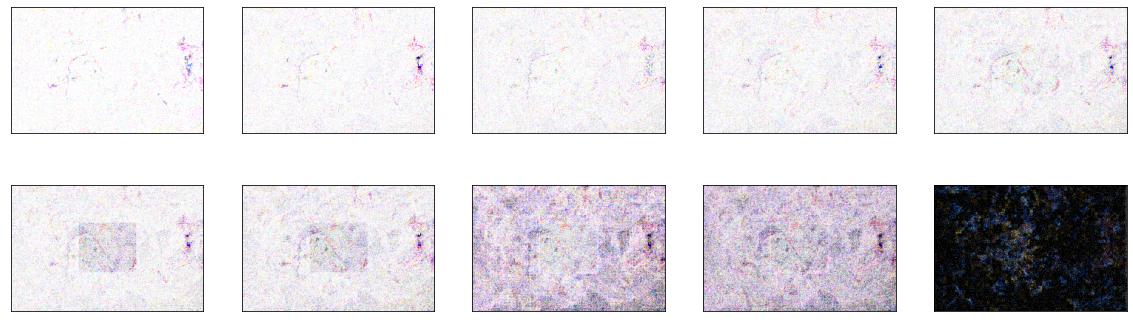

In [8]:
plt.figure(figsize=(20,6))
for i in range(bound):
    plt.subplot(2,bound/2,i+1)
    plt.imshow(stack[i])
    plt.xticks([])
    plt.yticks([])
plt.show()